<a href="https://colab.research.google.com/github/KeerthiMettu/Information-Theory/blob/main/A4_Mettu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name :** Sai Keerthi Mettu

**Student ID:** 200416252

**Email :** smj102@uregina.ca


**This is a Jupyter notebook to demonstrate the transmission of message in a noisy channel and decode the error message using Hamming Code - Forward Error Correction (FEC) technique through the Manchester Encoding Scheme.**

The main focus of this notebook is to invoke the Hamming code type of FEC in the Manchester encoding system. 


Before trying this approach, I initially tried implementing Triple Redundancy Error Correction codes, but it resulted in multiple errors on the receiver side which lead to switching to the Hamming code type. Although Hamming code is elemental in understanding the error detection and correction techniques, when dealt with larger messages, makes it a little complex. So, the following is the brief introduction and working of the Hamming Code principle. 

**Hamming code:**

Hamming code is a type of Forward Error Correction (FEC) method. It was invented by Richard W. Hamming at Bell Labs in 1950 [1]. It helps in the correction of single-bit errors and also in the detection of two-bit errors. Hamming code is generated by adding the redundant bits (parity) to the original codes on the transmitter side. When this hamming code is received at the receiver end, the code is looked up for errors by calculating the syndrome and determine the error position in the message if present. 

The key to identifying the single-bit errors in different variants of hamming code is by allowing the usage of extra parity bits [2]. The Hamming (12,8) a variant of hamming codes is implemented in this notebook, which encodes an 8-bit message into the 12-bit transmission that consists of additional 4 parity bits with the original data. Steps involved in the encoding and decoding a Hamming code are:

Encoding steps: 
1. Generate the parity check matrix 
2. Creation of the Code generator matrix from the combination of a data identity matrix and the parity matrix.
3. Multiply the generator matrix with the original message to bring a linear hamming code. 

Decoding steps:
1. Multiply the received message with the previously created parity check matrix. The resultant here is the syndrome vector-matrix
2. If the syndrome is natural, then there is no error in the message, else it is the value of the error position in the hamming code received. 


As this technique supports only in the single error correction, after the generation of hamming codes for the original message, noise is added in such a way that only one bit is randomly affected in each of the characters. This means only one bit is altered in the ascii bytes of the message to be transmitted. Later on, the receiver end, after the line decoding is performed, the noise included message is verified against the error detection process. Once the error location is identified by the syndrome calculation in hamming code, the error bit is rectified and the additional parity bits are removed. Further, the ascii message bits are translated to the string format. 




**Implementation of Hamming code - FEC scheme**

The following method use the hamming code generation formula i.e., (2^m)-1=x where m= number of parity bits and x is the original data length and helps to identify the value of m. 

In [ ]:
def getRedundantBits(datalength): 
    # Use the formula (2 ^ r) -1 >= m + r  to calculate the no of redundant bits.
    for i in range(datalength): 
        if((2**i -1 )>= datalength + i): 
            return i 

This method will aid in calculating the parity bits based on the remaining data bits and it was originally authored by (Santhosh, 2020)[4].
According to the parity scheme determined in the hamming code principle, the values of the parity bits are: 

P1 = D1 + D2 + D4 + D5 + D7

P2 = D1 + D3 + D4 + D6 + D7

P3 = D2 + D3 + D4 + D8

P4 = D5 + D6 + D7 + D8 

![alt text](https://i.stack.imgur.com/p4xfw.png) [3]


In [ ]:
def calculateParityBits(msgbits, r): 
    length = len(msgbits) 
  
    # For finding rth parity bit, iterate over 0 to r - 1 
    for i in range(r): 
        x = 0
        for j in range(1, length + 1): 
            # If position has 1 in ith significant position then Bitwise OR the array value 
            # to find parity bit value. 
            if(j & (2**i) == (2**i)): 
                x = x ^ int(msgbits[-1 * j])  # -1 * j is given since array is reversed 

        # (0 to n - 2^r) + parity bit + (n - 2^r + 1 to n) 
        msgbits = msgbits[:length-(2**i)] + str(x) + msgbits[length-(2**i)+1:] 
    return msgbits 

This is the actual method that is responsible for generation of hamming code FEC Scheme, where for a given ascii format data (i.e., 8-bit binary data) into a 12-bit encoded hamming code. Some of the logic was implemented using the code from GeeksforGeeks website (Akul, 2020)[4]. 

In [ ]:
def hamming_code(datalist):

    data = ''.join(map(str, datalist)) # converting a list to string
    #variable declarations
    j=0
    k=1
    p_data=''
    h_code = ''
    l=len(data)
    parity_bits=getRedundantBits(l)

    #at positions of 2 power m, simply append a '0'
    p_data_range=parity_bits+l+1
    for i in range(1,p_data_range):
        if(i == 2**j):
            p_data=p_data + '0'
            j = j+1
        else:
            p_data = p_data + data[-1 *k]
            k = k+1
    
    p_code= p_data[::-1] # reversing the entire data as '0' is appended in positions from backward direction
    h_code=calculateParityBits(p_code, parity_bits)

    return h_code

In [ ]:
a = hamming_code('01101011') # k (01101011)- 011010110000;  S (01010011) - 010100110100
print(a)

011001010100


**Decoding and Parity Check**

This method is used to calculate the syndrome of the resultant hamming code on receiver end along with parity. This yield's the error position in binary and can be transmitted as a decimal position result. It was originally authored by Atul, 2020 [4]

In [ ]:
def detect_error_position(code): 
    res = 0
    parity =4 # this encoding variant has 4 redundant parity bits
    for i in range(parity): 
        val = 0
        for j in range(1, len(code) + 1): 
            if(j & (2**i) == (2**i)): 
                val = val ^ int(code[-1 * j]) 
        #the binary number is made by joining the parity bits
        res = res + val*(10**i) 
    # Conversion from binary to decimal 
    return int(str(res), 2)

In [ ]:
#Example
  
arr = '011001101100'
# arr = [0 1 1 0 0 1 1 1 1 1 0 0]  #[0,1,1,0,0,1,0,0,0,1,0,0]
print("Error Data received be " + arr) 
errorbit = detect_error_position(arr) 
print("The position of the error in codeword is: " + str(errorbit))

Error Data received be 011001101100
The position of the error in codeword is: 7


The logic for the conversion of a hamming code into the original message can be retrieved by removing the parity bits. This will just leave the data bits of the ASCII or binary bits of the message. Hence, it is understood that the parity bits are located in the 2^m indices (1,2,4 and 8 positions) and they can be eliminated. 

![alt text](https://www.computing.dcu.ie/~humphrys/Notes/Networks/tanenbaum/3-07.jpg) [5]


In [ ]:
def convert_hamming_ascii(code):
    code = str(code)
    code = ''.join(e for e in code if e.isalnum()) # removes all special characters

    # code= "".join(code.split()) # removing any spaces
    # remove the redundant bits at 2^0, 2^1, 2^2, 2^3 i.e., at indexes 1, 2, 4 and 8.
    code = code[0 : 4 : ] + code[4 + 1 : :]
    code = code[0 : 7 : ] + code[7 + 1 : :]
    code = code[:-2:]

    return code


**Integration of hamming code with Manchester Line coding**

Steps involved in the encoding process:
1. Convert a string message into binary with each character containing its 8-bits (in the ascii format)
2. Encode this ascii message with hamming code (into 12-bits for each word)
3. Addition of noise to the bits present in the ascii bytes data
4. Creation of additional bits like a clock, timer, etc for the transmission of message like a Manchester line signal.
5. Transmit the encoded Manchester signal from the sender.

Steps involved in the decoding process:
1. The signal received is first translated using the Manchester decoding technique. (involves the reverse operation of signal data bits with clock bits)
2. The derived data at this point is a list of hamming code words. Now split the 12-bits of length words, for each character.
3. Check for any presence of error in each 12-bit length word.
4. If a single error is detected, then flip the bit (1 to 0 or vice versa) present in the position stated by the hamming code error-detection method. 
5. On doing the error correction, decode the hamming code back to its 8-bit binary format.
6. The resultant ascii bits of the words can be converted to the string format by joining all the characters and read the original message that was transmitted. 


In [ ]:
# Import Reguired Libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import random as random
import math

# using this to filter the warnings generated on stem plot distribution
import warnings as w
w.simplefilter('ignore')

In [ ]:
originalString="ke"

In [ ]:
"""
def noise( signal_Length,amplitude):
  noiseList=[]
  r=1000 # considering an upper limit for defining the range values
  # adding some randomly generated bits to the noise list
  for i in range(0,signal_Length):
    noiseList.append(random.randint(0,r)*amplitude/r)
  return noiseList
 """ 

'\ndef noise( signal_Length,amplitude):\n  noiseList=[]\n  r=1000 # considering an upper limit for defining the range values\n  # adding some randomly generated bits to the noise list\n  for i in range(0,signal_Length):\n    noiseList.append(random.randint(0,r)*amplitude/r)\n  return noiseList\n '

The following method is specially written to add noise in the hamming encoded resultant bits (12-bit length bits). As hamming code FEC words only for correction and detection of single bit errors, this noise method is made sure that it alters only one bit in a 12-bit sequence. 

In [ ]:
def hamming_noise(hc_bitsList):
    n_list=list(hc_bitsList)
    #alter only one bit within every 12 bits of code
    x= random.randint(0,len(hc_bitsList)-1) #getting a random index for modifying a bit in the list
    modifiedbit=n_list[x]
    if (modifiedbit == 1): # modifying only one bit in a character
        modifiedbit=0
    else:
        modifiedbit=1                
    n_list[x] = modifiedbit
    return n_list

In [ ]:
#method used for encoding
def convert_toBits(message):
    # Converting String to binary 
    res = ''.join(format(ord(i), 'b') for i in message)
    #converting the bits string to a list
    res=list(res)
    res[:0] = [0] 
    #converting each str bit to int bit
    for i in range(0, len(res)): 
        res[i] = int(res[i])  
    return (res)

In [ ]:
print(hamming_code(convert_toBits('k')))

011001010100


In [ ]:
def encodeWithNoise(originalMessage):
    bitsList = []
    # get the binary form of the original string
    for each_char in originalMessage:
      bits= convert_toBits(each_char)
      bitsList.append(bits)

    #encoding the bits using hamming code
    hc_list = []
    for eachlist in bitsList:
      # hc_list.append(0);
      temp=(hamming_code(eachlist))
      for value in temp:
        hc_list.append(int(value))

    #addition of hamming noise
    noise_list= hamming_noise(tuple(hc_list)) # bcoz lists are mutable so changing to tuples

    # doubling the data bits to derive half way transitions in the bit period. 
    dataList = np.repeat(noise_list, 2) 
    
    # create a clock signal
    bits_length=len(dataList)
    total_time= np.arange(bits_length) #array of individual time slots needed on X-axis
    clock = total_time % 2  # array with series of 1's and 0's

    #creating the manchester signal bits
    bool_signals= np.logical_xor(clock, dataList) # XOR of two arrays returns True/False values
    signals = 1 - bool_signals 

    #timer variable for slitting the bit period to half
    t = 0.5 * np.arange(bits_length)

    viewAllSignals(hc_list, t,clock,dataList,signals,noise_list)
    # print("bits - ",hc_list)
    # print("noise - ",noise_list)
    return (signals, hc_list, noise_list)

In [ ]:
def set_gridlines(axis, position, *args, **args2):
    if axis == 'x':
        for i in position:
            plt.axvline(i, *args, **args2)
    else:
        for i in position:
            plt.axhline(i, *args, **args2)

In [ ]:
def viewAllSignals(bitsList, t,clock,dataList,signals,noiseSignal):
  # visualize the manchester signal along with clock and data signals
  fig = plt.figure(figsize = (18,8))

  #draw the grid lines setting for x and y axis
  set_gridlines('x', range(len(bitsList)+1), color='.7', linewidth=1)
  set_gridlines('y', [0.5, 2, 4], color='.7', linewidth=1)

  # draw the signals in steps like plot along the length the time slots
  plt.step(t, clock + 4, 'g', linewidth = 1.5, where="post", label='clock')
  plt.step(t, dataList + 2, 'r', linewidth = 1.5, where="post", label='Hamming data')
  plt.step(t, signals , 'b', linewidth = 1.5, where='post', label='Manchester signal')
  #plotting the noise added manchester signal
  # plt.step(t, noiseSignal,'black', linewidth=1.5,where='post',label='Noise added Manchester signal')
  plt.ylim([-1,6])

  #print the bit data values on grid for each bit period
  for tbit, bit in enumerate(bitsList):
    plt.text(tbit + 0.5, 1.5, str(bit)) #values adjusted to print just under data bits

  #setting the labels
  plt.ylabel('Clock ',rotation=0)

  plt.gca().axes.get_yaxis().set_visible(False)
  plt.legend(title='Signals: ')
  plt.show()

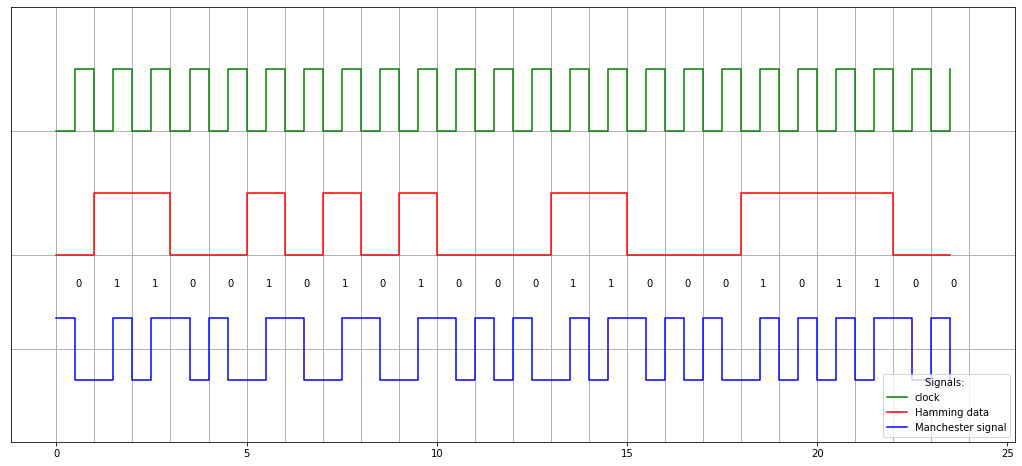

In [ ]:
ManchesterSignal, orginaldata, noisydata = encodeWithNoise(originalString)

In [ ]:
def Convert_toString(bits):
   n=int(bits,2)
   text= ''
   for i in range(0, len(bits), 7): 
       temp_data = bits[i:i + 7] 
       decimal_data = int(temp_data,2)
       text = text + chr(decimal_data)
   return text

In [ ]:
def decode(signal):
    #creating the clock signal from given signal
    signal_length=len(signal)
    t_time= np.arange(signal_length) #array of all time slots plotted on X-axis
    clock = t_time % 2  # array with series of 1's and 0's

    #apply reverse XOR on clock and the Manchester encoded signal to get data values
    bool_outputs= np.logical_xor(clock, signal) # XOR of two arrays returns True/False values
    data_duplicate = 1 - bool_outputs 

    #omit the duplicate bit values
    data=[]
    data=data_duplicate[::2]

    #convert the hamming codes to different lists of each word is of length 12 bits
    firstWord= data[:12]
    lastWord= data[12:]
    
    #convert to string format and remove space
    firstWord=''.join(e for e in str(firstWord) if e.isalnum())
    lastWord=''.join(e for e in str(lastWord) if e.isalnum())

    #check for errors in received hamming codes and retrieve error position
    f1 = detect_error_position(firstWord) 
    f2 = detect_error_position(lastWord)
    print("The position of errors is both codewords are " ,f1 ,  " and " , (f2), " respectively")
    
    
    #correct the error bits in hamming codewords
    if (f1 != 0):
      index = 12 - f1
      if (firstWord[index] == '0'):
          firstWord = firstWord[:index] +'1'+ firstWord[index +1 :]
      else:
          firstWord = firstWord[:index] +'0'+ firstWord[index +1 :]
    if (f2 != 0):
      index = 12 - f2
      if (lastWord[index] == '0'):
          lastWord = lastWord[:index] +'1'+ lastWord[index +1 :]
      else:
          lastWord = lastWord[:index] +'0'+ lastWord[index +1 :]

    #convert hamming codeword to ascii code word of 8 bits
    first_ascii=int(convert_hamming_ascii(firstWord))
    second_ascii=int(convert_hamming_ascii(lastWord))

    original_text=Convert_toString(str(first_ascii)) + Convert_toString(str(second_ascii))

    # print("first word", str(firstWord))
    # print("last word", str(lastWord))
    print("The final message after doing error correction: ")
    return original_text

In [ ]:
output = decode(ManchesterSignal)

output

The position of errors is both codewords are  0  and  5  respectively
The final message after doing error correction: 


'ke'

In [ ]:
def SNRpercentage(original,noisy):
  variance=0
  percentage_value=0
  message_length=len(original)
  for x in range(message_length):
    if original[x]!=noisy[x]:
      variance = variance +1

  percentage_value=(variance/message_length) * 100
  return percentage_value


In [ ]:
percentValue=SNRpercentage(orginaldata,noisydata)
print(percentValue)

4.166666666666666


# **Comparison and Discussion:**

**How much improvement was there in the percent-correct versus the signal-to-noise ratio?**

Firstly there are certain changes made within the integration of Hamming code technique with the noise included Manchester Line coding. They are:
 1. Inclusion of noise is limited to very few characters in a string, such that there is at most one error for each character bits. (Customized the noise generation function, to prove the efficacy of Hamming code FEC)
 2. In the decoding process, the errors detected in the codewords are corrected and transmitted. 
 
As there is a restriction of noise added to the data bits in the above program, the percentage of noise when compared with the original message bits is always minimal. This is also a considerable change from the previous assignment where the correctness of message was around 20% and now it is about 95% even before the decoding of the message bits. This wouldn't be possible without the constraint on noise. Hence in simple terms, it is a drastic 
performance change in the SNR percentage value. 

---
**What are the limitations of your encoding scheme (we discussed a specific metric in class that you might wish to mention here)?**

The biggest limitations of this encoding scheme comprising the Hamming code are:
1. Ability to correct only the single-bit errors, detect up to two errors (only if they are consequent) and cannot do any more than that. (It also means that hamming codes are inefficient in extreme noisy channels). Thus, the constraint of adding noise to a message, like only in the ratio of 1:12 makes it successful else deficient. 
2. The complexity of the encoding and processes increases with the increase in the transmission of data bits. (also causes in increased usage of bandwidth) 
3. On one hand, Manchester encoding takes multiple intermediate signals to transmit and receive signals and on the other hand, the hamming code conversions make it even more complicated by in-between bits transitions. 

---

**Are there any disadvantages to the scheme that you’ve chosen?**

As discussed above, this scheme is bound to correct only single-bit errors in the message, due to the enforcement of hamming code encoding. Although it can detect and correct the single-bit errors, the biggest challenge is that it fails when there is more than a single error. Another disadvantage is that it involves plenty of data formats and conversions to achieve the desired output. This can be better resolved by standardizing the code over time. 

---
**Are there any advantages that your original scheme from A1 had over your newly implemented scheme?**

There are plenty of advantages when compared to the scheme evolution from A1 to A4. The basic Manchester encoding and decoding scheme has the potential to rectify the noise with the addition of FEC - Hamming code approach. This latest code can detect the error in the bits and can also correct them on the receiver end. Apart from the implementation of the FEC in this scheme, it has given a greater understanding in the logical and digital conversions of a signal message from a noisy channel into a perfect linear signal that can be error-free. 



**References:** 

[1]“The Hamming Codes : History of Information.” Www.Historyofinformation.Com, www.historyofinformation.com/detail.php?id=69. Accessed 6 Aug. 2020.

[2]“Calculating the Hamming Code.” Users.Cs.Fiu.Edu, users.cs.fiu.edu/~downeyt/cop3402/hamming.html. Accessed 6 Aug. 2020.

‌[3]Imgur.Com, 2020, i.stack.imgur.com/p4xfw.png. Accessed 8 Aug. 2020.

[4]Santhosh, Akul. “Hamming Code Implementation in Python.” GeeksforGeeks, 2 Jan. 2020, www.geeksforgeeks.org/hamming-code-implementation-in-python/. Accessed 6 Aug. 2020.

‌[5]“Hamming Code (1 Bit Error Correction).” Www.Computing.Dcu.Ie, www.computing.dcu.ie/~humphrys/Notes/Networks/data.hamming.html. Accessed 8 Aug. 2020.

‌